In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TensorFlow 2.x selected.


In [3]:
train_dir = 'CK+48'

train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=45,
      width_shift_range=0.15,
      height_shift_range=0.15,
      shear_range=0.2,
      zoom_range=0.5,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')


Found 981 images belonging to 7 classes.


In [6]:
train_generator.target_size

(48, 48)

In [9]:
model = tf.keras.models.Sequential([
                    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)),
                    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                    tf.keras.layers.Dropout(0.3),

                    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
                    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                    tf.keras.layers.Dropout(0.3),
                    
                    tf.keras.layers.Conv2D(512, kernel_size=(3, 3), activation='relu'),
                    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                    tf.keras.layers.Dropout(0.3),
                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(1024, activation='relu'),
                    tf.keras.layers.Dropout(0.3),
                    tf.keras.layers.Dense(7, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 128)       36992     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 512)        

In [10]:
history = model.fit_generator(
          train_generator,
          epochs=100)

model.save('model.h5')

  ...
    to  
  ['...']
Train for 16 steps
Epoch 1/100
16/16 [==============================] - 1s 93ms/step - loss: 1.8722
Epoch 2/100
16/16 [==============================] - 1s 59ms/step - loss: 1.8427
Epoch 3/100
16/16 [==============================] - 1s 57ms/step - loss: 1.8201
Epoch 4/100
16/16 [==============================] - 1s 58ms/step - loss: 1.7951
Epoch 5/100
16/16 [==============================] - 1s 57ms/step - loss: 1.7643
Epoch 6/100
16/16 [==============================] - 1s 57ms/step - loss: 1.6895
Epoch 7/100
16/16 [==============================] - 1s 58ms/step - loss: 1.6230
Epoch 8/100
16/16 [==============================] - 1s 58ms/step - loss: 1.5811
Epoch 9/100
16/16 [==============================] - 1s 59ms/step - loss: 1.5790
Epoch 10/100
16/16 [==============================] - 1s 58ms/step - loss: 1.5391
Epoch 11/100
16/16 [==============================] - 1s 57ms/step - loss: 1.4508
Epoch 12/100
16/16 [==============================] - 1s 56ms/s

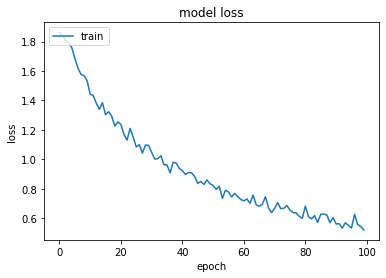

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

In [0]:
model.save_weights('modelw.h5')